In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_excel('data.xlsx')

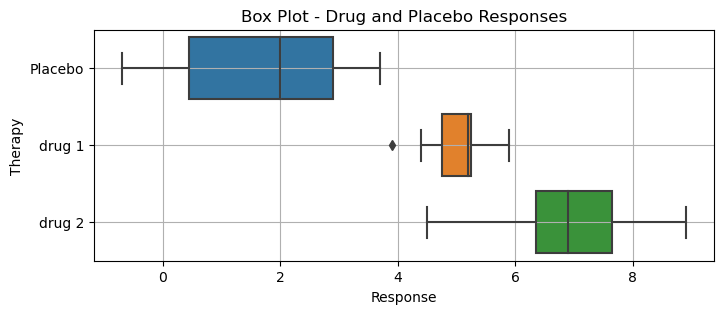

In [9]:
# Box plot
plt.figure(figsize=(8, 3))
sns.boxplot(data=df, orient="h")
plt.xlabel("Response")
plt.ylabel("Therapy")
plt.title("Box Plot - Drug and Placebo Responses")
plt.grid()
plt.show()

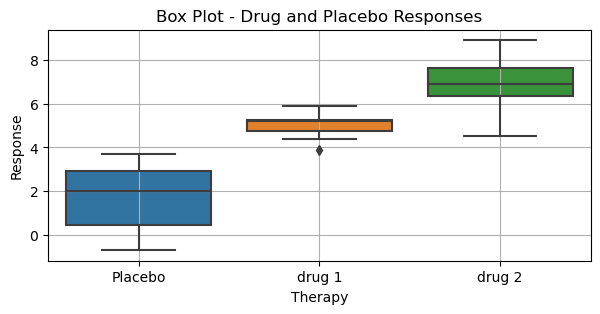

In [10]:


plt.figure(figsize=(7, 3))
sns.boxplot(data=df, orient="v")  # Change orient to "v"
plt.xlabel("Therapy")  # Reversed xlabel and ylabel due to vertical orientation
plt.ylabel("Response")  # Reversed xlabel and ylabel due to vertical orientation
plt.title("Box Plot - Drug and Placebo Responses")
plt.grid()
plt.show()


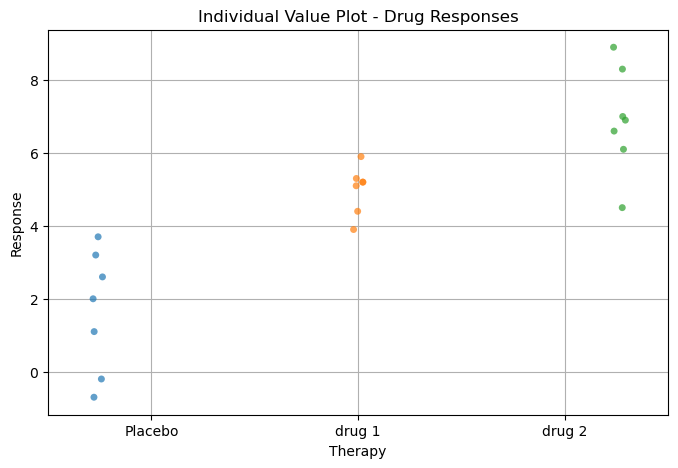

In [11]:
# Create individual value plot
plt.figure(figsize=(8, 5))
sns.stripplot(data=df, jitter=True, dodge=True, alpha=0.7)
plt.xlabel("Therapy")
plt.ylabel("Response")
plt.title("Individual Value Plot - Drug Responses")
plt.grid()
plt.show()

In [12]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
anova_result = f_oneway(df["Placebo"], df["drug 1"], df["drug 2"])

# Print ANOVA results
print("One-Way ANOVA Results:")
print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

# Interpret ANOVA results
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis. There are significant differences between treatment groups.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between treatment groups.")

One-Way ANOVA Results:
F-statistic: 27.67186240257992
P-value: 3.229876280413686e-06
Reject the null hypothesis. There are significant differences between treatment groups.


In [17]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison

# Perform one-way ANOVA
anova_result = f_oneway(df["Placebo"], df["drug 1"], df["drug 2"])

# Perform Tukey's multiple comparison test
multicomp = MultiComparison(df.melt()["value"], df.melt()["variable"])
result = multicomp.tukeyhsd(alpha=0.05)  # Significance level of 1%

print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1 group2 meandiff p-adj  lower  upper  reject
---------------------------------------------------
Placebo drug 1   3.3286 0.0005 1.5127 5.1445   True
Placebo drug 2   5.2286    0.0 3.4127 7.0445   True
 drug 1 drug 2      1.9 0.0395 0.0841 3.7159   True
---------------------------------------------------


In [18]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison

# Perform one-way ANOVA
anova_result = f_oneway(df["Placebo"], df["drug 1"], df["drug 2"])

# Perform Tukey's multiple comparison test
multicomp = MultiComparison(df.melt()["value"], df.melt()["variable"])
result = multicomp.tukeyhsd(alpha=0.01)  # Significance level of 1%

print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.01 
 group1 group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
Placebo drug 1   3.3286 0.0005  0.9622 5.6949   True
Placebo drug 2   5.2286    0.0  2.8622 7.5949   True
 drug 1 drug 2      1.9 0.0395 -0.4664 4.2664  False
----------------------------------------------------
